In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.simplex_plots as simplex_plots
from utils.simplex_plots import Dirichlet

# 1.1 Categorical-Dirichlet Model



## 1.1.1 Derive the MLE for the Categorical Distribution

Let $X=\{X_1, X_2, ..., X_N \}$ be i.i.d. random variables from a Categorical distribution of K categories with parameter $\theta=[\theta_1, ..., \theta_K]$.

The probability mass function, pmf, for observation n is given by: $p(X_n=x_n | \theta) = \prod_{k=1}^K \theta_k^{I(x_n=k)}$, where I is the indicator function.
Derive the MLE for $\theta$ for N observations.

### Solution:

First, a useful trick is to use the log-likelihood instead of the likelihood, since the log-likelihood is a monotonically increasing function. Thus, we have:
$$\arg \underset{\theta}{\operatorname{\max}} p(X | \theta) = \arg \underset{\theta}{\operatorname{\max}} \log p(X | \theta)
 \\ =  \arg \underset{\theta}{\operatorname{\max}} \log \big ( \prod_{n=1}^N p(X_n=x_n | \theta) \big ) = \arg \underset{\theta}{\operatorname{\max}} \log \big ( \prod_{n=1}^N \prod_{k=1}^K \theta_k^{I(x_n=k)} \big )$$

Pushing the log inside the product, the expression further simplifies to:
$$ \arg \underset{\theta}{\operatorname{\max}} \sum_{n=1}^N \sum_{k=1}^K (I(x_n=k)) \log \theta_k$$

We have the constraint that $\sum_{k=1}^K \theta_k = 1$, and thus turn to Lagrange multipliers:
$$ L = \log p(X | \theta) + \lambda ( \sum_{k=1}^K \theta_k - 1 ) $$ and solve for $\frac{\partial}{\partial \theta_k} L = 0$ and $\frac{\partial}{\partial \lambda} L = 0$:
$$\frac{\partial}{\partial \theta_k} L = \frac{\partial}{\partial \theta_k} \Big[ \sum_{n=1}^N \sum_{k=1}^K (I(x_n=k)) \log \theta_k + \lambda ( \sum_{k=1}^K \theta_k - 1 )\Big] = 0$$

Derivation with notes in can be found in the pdf in Canvas.

In [2]:
def MLE_categorical(x, num_classes):
    """
    Compute the MLE for the Categorical distribution.

    Args:
    x: a numpy array of shape (num_samples)
    num_classes: number of classes

    Returns:
    theta: a numpy array of shape (num_classes)
    """
    theta = np.zeros(num_classes)
    N = len(x)
    for k in range(num_classes):
        theta[k] = np.sum(x == k) / N
    return theta

### Solution:

One way is to derive the posterior distribution of $\theta | X$, e.g. by using conjugate priors, and then derive the MAP estimate of $\theta | X$.

Another way is to note that:
$$\arg \underset{\theta}{\operatorname{\max}} \frac{p(X, \theta)}{p(X)}  = \arg \underset{\theta}{\operatorname{\max}} p(X, \theta)  =  \arg \underset{\theta}{\operatorname{\max}}  p(X | \theta) p(\theta)$$

Since $p(X_n | \theta) = \prod_{k=1}^K \theta_k^{I(x_n=k)}$ and $p(\theta) = \frac{1}{B(\alpha)} \prod_{k=1}^K \theta_k^{\alpha_k - 1}$, we have:

$$\arg \underset{\theta}{\operatorname{\max}} p(X | \theta) p(\theta) = \arg \underset{\theta}{\operatorname{\max}} \prod_{n=1}^N \prod_{k=1}^K \theta_k^{I(x_n=k)} \cdot \frac{1}{B(\alpha)} \prod_{k=1}^K \theta_k^{\alpha_k - 1} = \frac{1}{B(\alpha)} \prod_{k=1}^K \theta_k^{\sum_{n=1}^N I(x_n=k) + \alpha_k - 1}$$

Once again, we use the log-likelihood instead as it is easier to handle. Furthmore, $\frac{1}{B(\alpha)}$ is a constant w.r.t. $\theta$. Thus, we have:
$$\arg \underset{\theta}{\operatorname{\max}} \log p(X | \theta) p(\theta) =  \arg \underset{\theta}{\operatorname{\max}} \sum_{k=1}^K \big ( \sum_{n=1}^N I(x_n=k) + \alpha_k - 1 \big ) \log \theta_k$$

We have the constraint that $\sum_{k=1}^K \theta_k = 1$, and thus turn to Lagrange multipliers:
$$ L = \log p(X | \theta) p(\theta) + \lambda ( \sum_{k=1}^K \theta_k - 1 ) $$ and solve for $\frac{\partial}{\partial \theta_k} L = 0$ and $\frac{\partial}{\partial \lambda} L = 0$.

Derivation with notes in can be found in the pdf in Canvas.


## 1.1.2 Derive the MAP for the Categorical-Dirichlet Model
For $X_n$ ~ Categorical($\theta$), $\theta$ ~ Dirichlet($\alpha$), derive the posterior distribution of $\theta | X$. Using the posterior distribution, derive the MAP estimate of $\theta | X$.

In [3]:
def MAP_categorical_dirichlet(x, num_classes, alpha):
    """
    Compute the MAP for the Categorical-Dirichlet model.

    Args:
    x: a numpy array of shape (num_samples)
    num_classes: number of classes
    alpha: parameter of the Dirichlet distribution

    Returns:
    theta: a numpy array of shape (num_classes)
    """
    theta = np.zeros(num_classes)
    N = len(x)
    for i in range(num_classes):
        theta[i] = (np.sum(x == i) + alpha[i] - 1) / (N + np.sum(alpha - 1))  # N_j + alpha_j - 1 / N + sum(alpha - 1)
    
    return theta

## 1.1.3 Generate Data and Visuzalize MLE and MAP

Throughout this course, we will generate data from increasingly more complex models. Here, we will start with the simplest models, when we only have one distribution.

### Generate data from a Categorical and Dirichlet distributions


In [4]:
def generate_data_categorical(num_samples, num_classes, theta):
    """
    Generate data from a Categorical distribution.

    Args:
    num_samples: number of samples to generate
    num_classes: number of classes
    theta: a numpy array of shape (num_classes)

    Returns:
    data: a numpy array of shape (num_samples)
    """
    x = np.random.choice(num_classes, num_samples, p=theta)
    return x

def generate_data_dirichlet(num_samples, num_classes, alpha):
    """
    Generate data from a Dirichlet distribution.

    Args:
    num_samples: number of samples to generate
    num_classes: number of classes
    alpha: parameter of the Dirichlet distribution

    Returns:
    theta: a numpy array of shape (num_samples, num_classes)
    """
    if type(alpha) == float:
        alpha = alpha * np.ones(num_classes)

    theta = np.random.dirichlet(alpha, num_samples)
    return theta.squeeze()

### Test data generation

Generate data from the distributions and verify that the data generated is consistent with the parameters used for generation.

#### Test data generation - Categorical

In [5]:
theta_fixed = [0.35, 0.5, 0.15]
K_test = len(theta_fixed)
N_test = 10000
x_test = generate_data_categorical(num_samples=N_test, num_classes=K_test, theta=theta_fixed)
x_one_hot = np.eye(K_test)[x_test]

x_mean = np.mean(x_one_hot, axis=0)

assert np.allclose(x_mean, theta_fixed, rtol=0.1)

print(f"True theta: {theta_fixed} \nEstimated theta: {x_mean}")

True theta: [0.35, 0.5, 0.15] 
Estimated theta: [0.3319 0.513  0.1551]


#### Test data generation - Dirichlet


In [11]:
alpha_test = np.array([1., 1., 2.])  # Example: Higher alpha_k => higher probability for class k
theta_expected_value = alpha_test / np.sum(alpha_test)
theta_test = generate_data_dirichlet(num_samples=N_test, num_classes=K_test, alpha=alpha_test)

theta_mean = np.mean(theta_test, axis=0)

print(f"Expected value: {theta_expected_value} \n Sample mean: {theta_mean}")

assert np.allclose(theta_expected_value, theta_mean, rtol=0.1)

Expected value: [0.25 0.25 0.5 ] 
 Sample mean: [0.25 0.25 0.5 ]


### Generate data, calculate and visualize the MLE and MAP

Try yourself fir different values of $\alpha_{sim}$, N and different prior parameters $\alpha_0$. 

For what setting is the MAP estimate closer to the true value? Why?

What happens when N increases?

For what value of $\alpha_0$ is the MAP estimate = MLE estimate?

In [16]:
np.random.seed(0)
K = 3
alpha_sim = np.array([1., 1., 3.])
# Draw 1 Dirichlet sample theta
theta = generate_data_dirichlet(1, K, alpha_sim)
print(f"{theta.shape}")
# Draw N Categorical samples x
N = 20
x = generate_data_categorical(num_samples=N, num_classes=K, theta=theta.squeeze())

alpha_0 = np.ones(K) * 5. # Prior parameters (A higher alpha_0 means we anticipate samples from every class).
theta_MLE = MLE_categorical(x, K)
theta_MAP = MAP_categorical_dirichlet(x, K, alpha_0)
np.set_printoptions(precision=3)
print(f"True: {theta} \nMLE: {theta_MLE} \nMAP: {theta_MAP}")

(3,)
True: [0.12  0.189 0.692] 
MLE: [0.2 0.  0.8] 
MAP: [0.25  0.125 0.625]


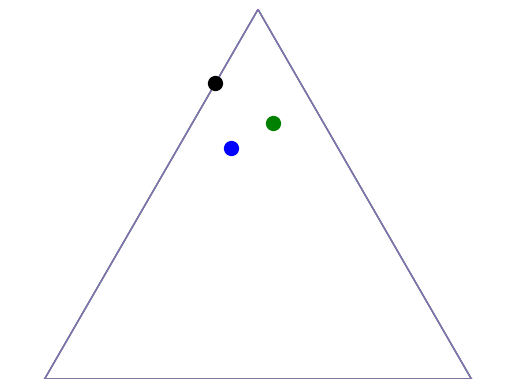

In [17]:
simplex_plots.plot_point(theta_MLE, point_size=20, color='black')
simplex_plots.plot_point(theta_MAP, point_size=20, color='b')
simplex_plots.plot_point(theta, point_size=20, color='g')


## 1.1.4 Bayesian inference

Derive an expression for the posterior distribution by identifying the distribution and conjugate priors.

### Solution:

Using the expressions of 1.1.2, we have that the posterior distribution is given by:

$$p(\theta | X) = \frac{p(X | \theta)p(\theta)}{p(X)} \propto p(X | \theta) p(\theta) = \prod_{n=1}^N \prod_{k=1}^K \theta_k^{I(x_n=k)} \cdot \frac{1}{B(\alpha)} \prod_{k=1}^K \theta_k^{\alpha_k - 1} = (\star)$$

We anticipate that the posterior distribution is a Dirichlet distribution due to conjugacy. Thus, we try to rewrite the expression in the form of a Dirichlet distribution (same form as the prior).

As $frac{1}{B(\alpha)}$ is a constant factor w.r.t., and we are only interested in the expression up to a normalizing constant, we proceed as follows:
$$ (\star) \propto \prod_{k=1}^K \theta_k^{\sum_{n=1}^N I(x_n=k)} \theta_k^{\alpha_k - 1} = \prod_{k=1}^K \theta_k^{\sum_{n=1}^N I(x_n=k) + \alpha_k - 1}$$

Now, note that $\prod_{k=1}^K \theta_k^{\sum_{n=1}^N I(x_n=k) + \alpha_k - 1}$ is on the exact same form as the prior part of the expression above, just with a different parameter $\alpha_k'={\sum_{n=1}^N I(x_n=k) + \alpha_k}$ instead of only $\alpha_k$. From this we can see that $$ \theta | X \sim \text{Dirichlet}(\alpha_k') = \text{Dirichlet}(\alpha + \sum_{n=1}^N I(x_n=k))$$

### Visualize the posterior distribution

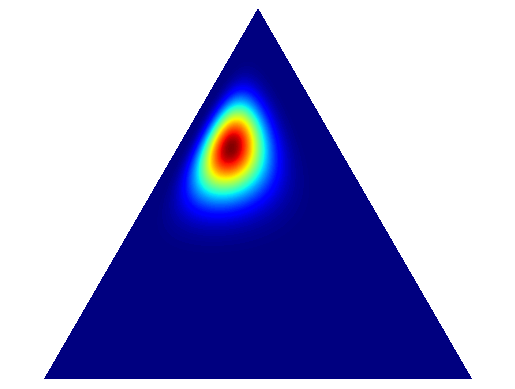

In [18]:
alpha_posterior = alpha_0 + np.bincount(x, minlength=K) # alpha' above
posterior_dist = Dirichlet(alpha_posterior)
simplex_plots.draw_pdf_contours(posterior_dist)

### Compare the posterior distribution with the MLE and MAP

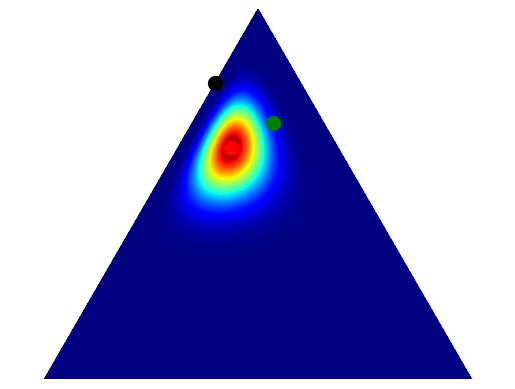

In [19]:
simplex_plots.plot_point(theta_MLE, point_size=20, color='black')
simplex_plots.plot_point(theta_MAP, point_size=20, color='red')
simplex_plots.plot_point(theta, point_size=20, color='g')
simplex_plots.draw_pdf_contours(posterior_dist)

# 1.2 Normal distribution with known variance

## 1.2.1 Derive the MLE for the Normal Distribution with known precision

Let $X=\{X_1, X_2, ..., X_N \}$ be i.i.d. random variables from a Normal distribution with known precision $\tau=\frac{1}{\sigma^2}$ and unknown mean $\mu$. Derive the MLE for $\mu$ for N observations.


### Solution:

The probability density function, pdf, for observation n is given by: $p(X_n=x_n | \mu, \tau) = \frac{\sqrt{\tau}}{\sqrt{2\pi}} \exp \big ( -\tau\frac{(x_n - \mu)^2}{2} \big )$.

As in the previous case, we use the log-likelihood instead of the likelihood:
$$\arg \underset{\mu}{\operatorname{\max}} \log p(X | \mu) =  \arg \underset{\mu}{\operatorname{\max}} \log \big ( \prod_{n=1}^N p(X_n=x_n | \mu) \big ) = \arg \underset{\mu}{\operatorname{\max}} \log \big ( \prod_{n=1}^N \frac{\sqrt{\tau}}{\sqrt{2\pi}} \exp \big (-\tau \frac{(x_n - \mu)^2}{2} \big ) \big ) = \arg \underset{\mu}{\operatorname{\max}} \sum_{n=1}^N \log \big ( \frac{\sqrt{\tau}}{\sqrt{2\pi}} \exp \big ( -\tau \frac{(x_n - \mu)^2}{2} \big ) \big )$$

See handwritten solution pdf.





## 1.2.2 Derive the MAP for the Normal model with known variance
Set a Normal prior for $\mu$ with mean $\mu_0$ and precision $\lambda$. 
Derive the MAP estimate for $\mu$.

Left as an exercise. No solution provided.

## 1.2.3 Bayesian inference

Derive the posterior distribution of $\mu | X$.

### Solution:
For the posterior, we will use the technique of "identifying the distribution" together with the fact that the Normal is a conjugate prior to the Normal-likelihood with known precision. 

This time we will instead work in log scale, where constant factors instead become additive terms which can be removed. 

First, lets look at our prior distribution:

Prior distribution: $p(\mu) = \frac{\sqrt{\lambda}}{\sqrt{2\pi}} \exp \big ( -\frac{\lambda(\mu - \mu_0)^2}{2} \big )$

Log prior: $\log p(\mu) = \log \big ( \frac{\sqrt{\lambda}}{\sqrt{2\pi}} \exp \big ( -\frac{\lambda(\mu - \mu_0)^2}{2} \big ) \big ) = \log \big ( \frac{\sqrt{\lambda}}{\sqrt{2\pi}} \big ) - \frac{\lambda(\mu - \mu_0)^2}{2}$

The log posterior distribution is given by:

$$\log p(\mu | X) += \log p(X | \mu) + \log p(\mu) = \sum_{n=1}^N \log \big ( \frac{\sqrt{\tau}}{\sqrt{2\pi}} \exp \big ( -\tau \frac{(x_n - \mu)^2}{2} \big ) \big ) + \log \big ( \frac{\sqrt{ \lambda}}{\sqrt{2\pi}} \exp \big ( -\frac{\lambda(\mu - \mu_0)^2}{2} \big ) \big )$$

Solution continued in the handwritten notes pdf.